In [ ]:
#Task1
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from keras.layers import Dense
import numpy as np

AttributeError: partially initialized module 'jax' has no attribute 'tree_util' (most likely due to a circular import)

In [ ]:
data = pd.read_csv('Rain.csv')

In [ ]:
X = data.drop('RainTomorrow', axis=1)
y = data['RainTomorrow']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
pca = PCA(n_components=4)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [ ]:
for _ in range(10):
    model.add(Dense(9, activation='relu', input_dim=4 if _ == 0 else None))

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train_pca, y_train, batch_size=45, epochs=200, verbose=0)

In [ ]:
last_7_epochs = history.history['loss'][-7:]
last_7_accuracy = history.history['accuracy'][-7:]

In [ ]:
print("Last 7 Epochs Loss:", last_7_epochs)
print("Last 7 Epochs Accuracy:", last_7_accuracy)

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test_pca, y_test, verbose=0)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

In [ ]:
#Task2
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score

In [ ]:
data = pd.read_csv('regression.csv')

In [ ]:
data['x^2'] = data['x'] ** 2
data['ln(x)'] = np.log(data['x'])

NameError: name 'np' is not defined

In [ ]:
X = data[['y', 'x^2', 'ln(x)']]
y = data['x']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

KeyError: "['ln(x)'] not in index"

In [ ]:
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

NameError: name 'RobustScaler' is not defined

In [ ]:
model = ElasticNet()
model.fit(X_train_scaled, y_train)

NameError: name 'ElasticNet' is not defined

In [ ]:
train_score = model.score(X_train_scaled, y_train)
test_score = model.score(X_test_scaled, y_test)

In [ ]:
print(f'Training Score: {train_score}')
print(f'Test Score: {test_score}')

In [ ]:
new_data = pd.DataFrame({'y': [1.5, 2.0], 'x^2': [1.5**2, 2.0**2], 'ln(x)': [np.log(1.5), np.log(2.0)]})
new_data_scaled = scaler.transform(new_data)

In [ ]:
predictions = model.predict(new_data_scaled)
print(f'Predicted Values: {predictions}')

In [ ]:
#Task3
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
data = pd.read_csv('Cluster.csv')

In [ ]:
print(data.head())

   Feature1   Feature2
0  3.569093   8.851799
1  4.845852   9.987391
2  2.722515  10.275398
3  8.019633  11.057709
4  2.646991  10.211683


In [ ]:
X = data[['Feature1', 'Feature2']]

In [ ]:
inertia = []
k_values = range(1, 11)

In [ ]:
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

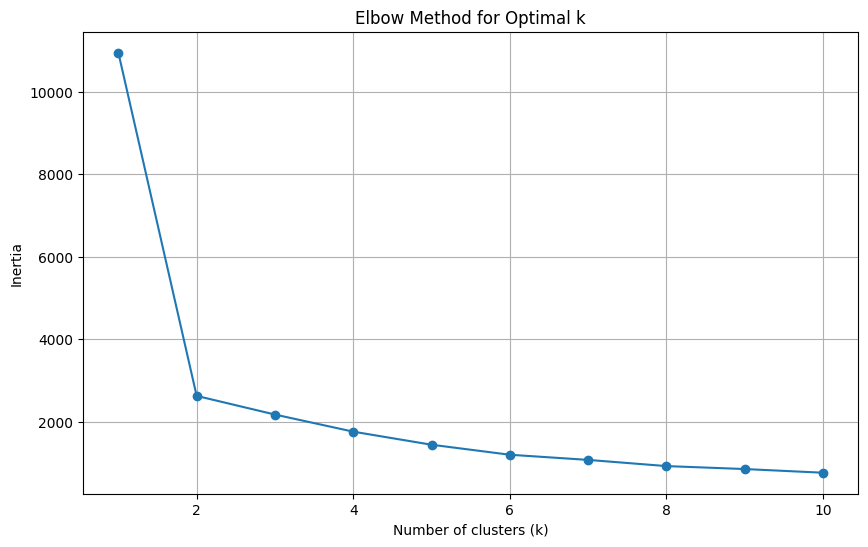

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.grid()
plt.show()

In [ ]:
optimal_k = 3

In [ ]:
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X)

NameError: name 'optimal_k' is not defined

In [ ]:
centers = kmeans.cluster_centers_

In [ ]:
data['Cluster'] = kmeans.labels_

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Feature1'], data['Feature2'], c=data['Cluster'], cmap='viridis', marker='o', label='Data Points')
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', s=200, label='Cluster Centers')
plt.title('Clusters and their Centers')
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.legend()
plt.grid()
plt.show()

KeyError: 'Cluster'

<Figure size 1000x600 with 0 Axes>